# Sales and Advertisement Strategy Planning Based on Amazon Review Analysis

### Amazon review datasets [1] contain product reviews and meta data including 142.8 million reviews from May 1996 to Jul. 2014. Review files are available per category and include review text, time, rating, etc. which are invaluable source of information on customer purchase patterns and interests.

### There is much interest in analysis of the user review data to understand the  user behavior and make business decisions. Reviews and ratings are mainly used to understand the individual user’s taste and product specifics, this is in turn helps a recommender system to make advertisement decisions, and recommend products that may be interesting to the user. This is usually implemented using a latent-factor model. However, in a different point of view, one can also track aggregate user behavior with regard to product categories by looking at the time stamp information.
### In this proposal, by looking at the distinctive features of the aggregate review counts for different product categories, I have tried to gain insight into the sales figures of that category. 

### Extracting such information would become central in establishing or managing brands, or directing advertisement in the best way to stabilize/boost the sales. Combining categories that perform better in different times can also help keeping a consistent quarterly sales in department or online stores.

### [1] http://jmcauley.ucsd.edu/data/amazon/


## Assumption: Revew count reflects product sales

## Important days are marked by vertical lines on all barplots and from left to right indicate:

|Event|Week-of-the-year|
|----|-----|
|President’s day|  7|
|Easter| 14|
|Labor Day| 36|
|Black Friday| 48 |


# Observations

### **The data can be divided in two major categories**

1. 2014 counts conform well to 2013 data (Fig.1)
 - Electronics
 - Celphones
 - Video Games
 - Baby
 - Sports
 - Grocery
2. 2014 counts show a considerable grows compared to 2013 (Fig.2)
 - Home and Kitchen
 - Health
 - Pet suplies
 - Kindle store
 - Clothing
 - Beauty
 
### - Black Friday has the largest count for most of the categories, back-to-school season comes second.
### - In almost all categories onset of back to school season shows growth for 2014 compared to 2013.
### - Kindle store is not affected much by the events and shows an steady growth vs time.
### - Patio Lawn and Garden (Fig.3) has a high hit in Apr.-May and seems to be a good category to be combined with other categories to balance sales figures.
### - 2014 Data suggests a more aggressive sales for back-to-school season.
### - Comparing Amazon Instant video with the Box Office Sales, scraped from Box Office Mojo, shows opposite trend during weeks 16 and 17, probably worse box office performance enhanced the instant video demand. However, this trend is different for the available weeks in 2014.

# Questions:

1. Brake down the categories to estimate product life time.
2. Combine with sentiment analysis to understand effects of the events.
 

<img src="Fig11.png">

# Fig. 1

<img src="Fig21.png">

# Fig. 2

<img src="Fig31.png">

# Fig. 3

<img src="Fig41.png">

# Fig. 4

# ------------------------------------------------------------------------------------
# Code

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load the categorical review data, cleanup and put dataframes in a dictionary

In [2]:
category = {'Beauty':0, 'Baby':0, 'Health_and_Personal_Care':0,
              'Grocery_and_Gourmet_Food':0, 'Patio_Lawn_and_Garden':0,
              'Amazon_Instant_Video':0, 'Kindle_Store':0, 'Electronics':0,
              'Pet_Supplies':0, 'Sports_and_Outdoors':0, 'Video_Games':0,
              'Clothing_Shoes_and_Jewelry':0, 'Cell_Phones_and_Accessories':0, 
              'Musical_Instruments':0, 'Home_and_Kitchen':0}


for cname in category:
    print cname
    # read the entire file into a python array
    with open('datasets/reviews_%s_5.json'%cname, 'rb') as f:
        data = f.readlines()

    # remove the trailing "\n" from each line
    data = map(lambda x: x.rstrip(), data)
    data_json_str = "[" + ','.join(data) + "]"
    df = pd.read_json(data_json_str)
    df = pd.DataFrame(df['reviewTime'])
#    df.columns = ['reviewTime']
    #convert string to datetime
    df['reviewTime'] = pd.to_datetime(df['reviewTime'])

    category[cname] = df

Sports_and_Outdoors
Patio_Lawn_and_Garden
Amazon_Instant_Video
Pet_Supplies
Video_Games
Health_and_Personal_Care
Electronics
Kindle_Store
Beauty
Grocery_and_Gourmet_Food
Baby


## Plot 2013 and 2014 review counts for all categories

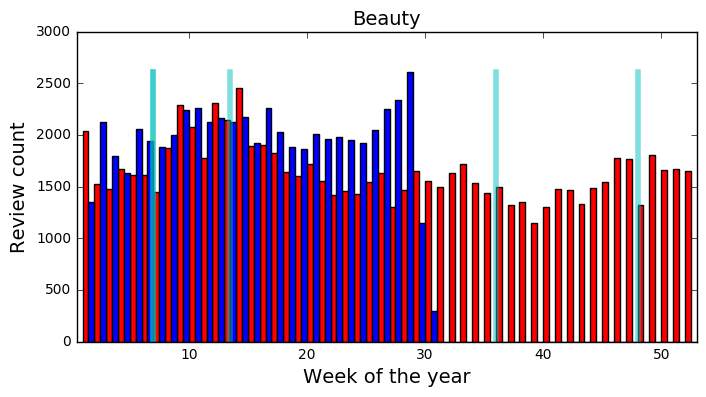

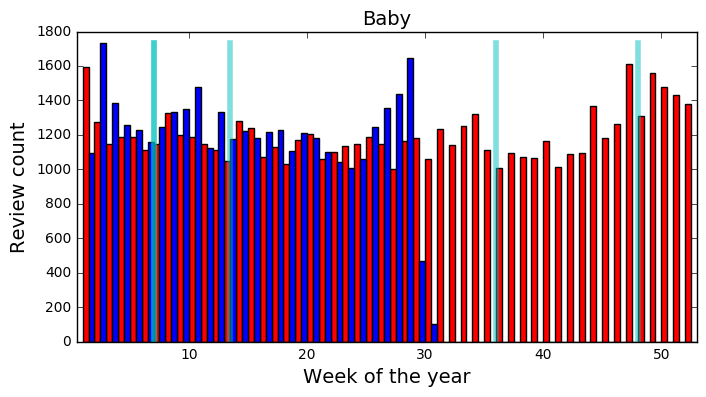

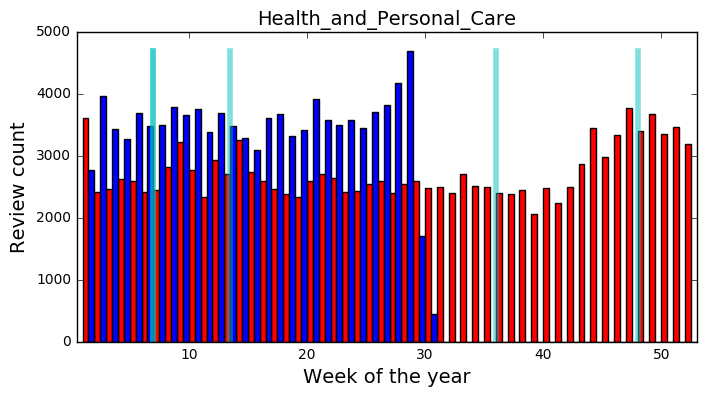

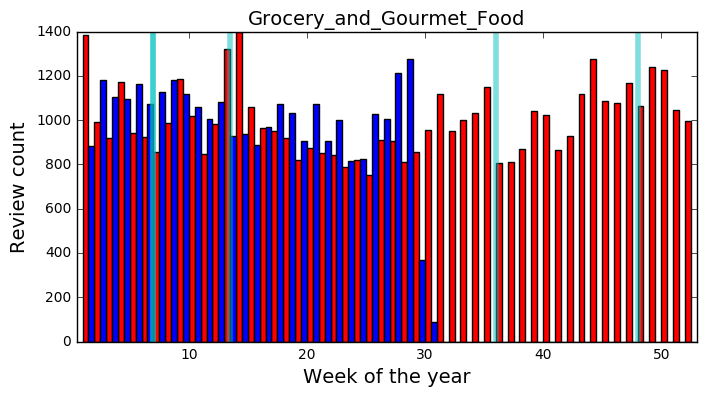

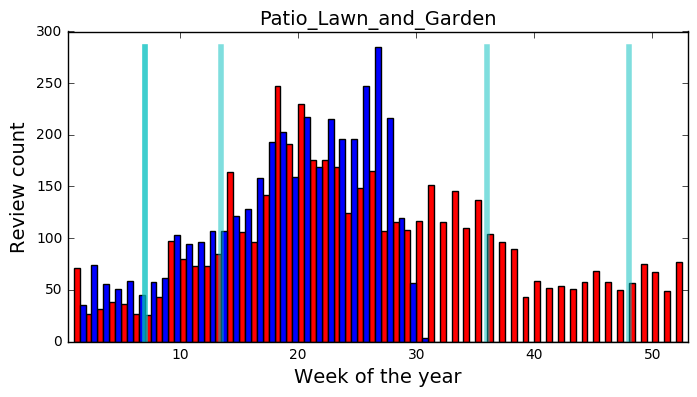

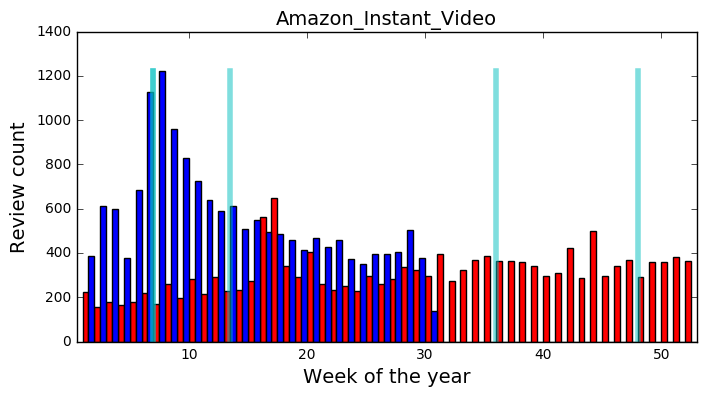

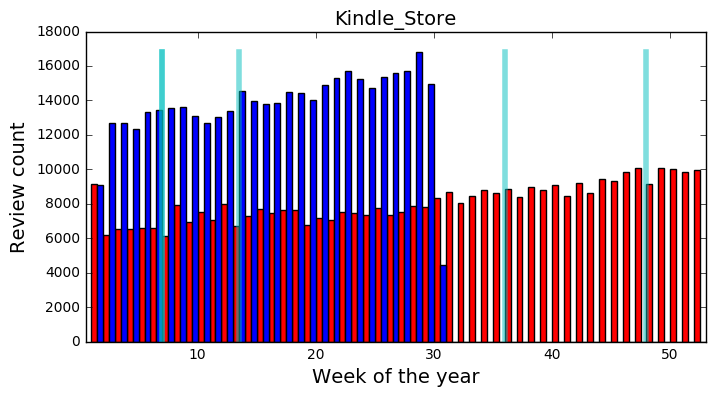

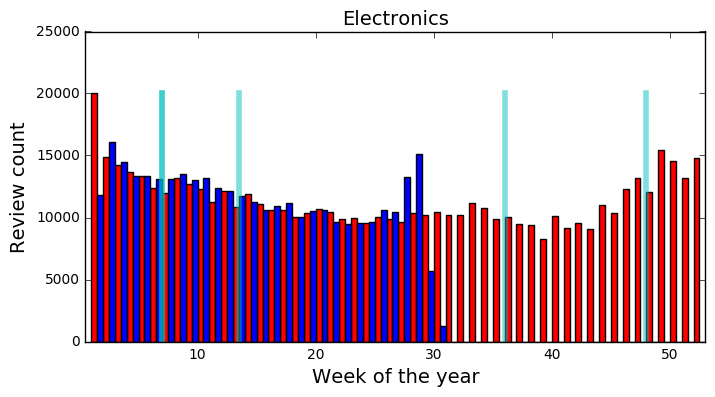

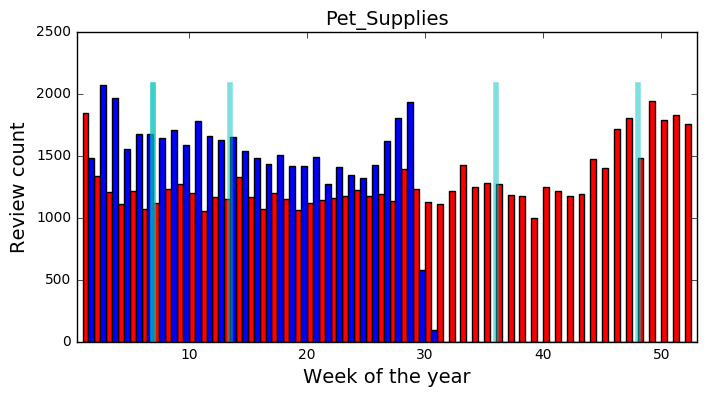

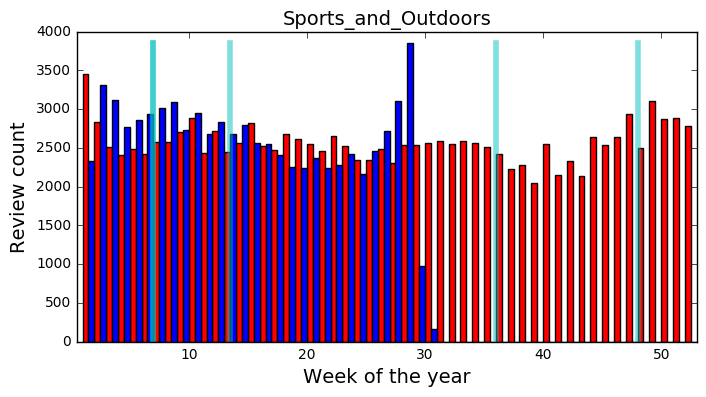

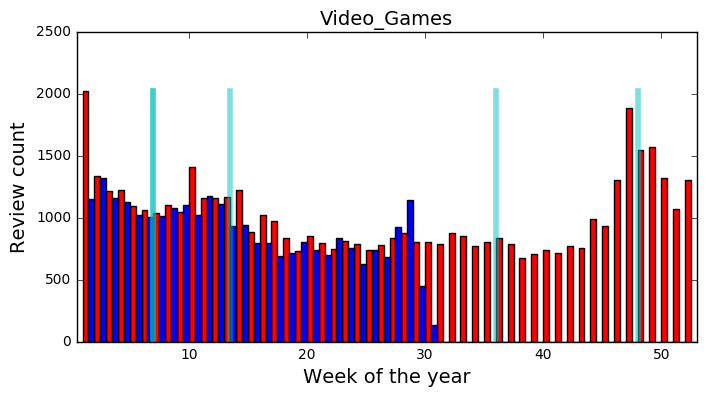

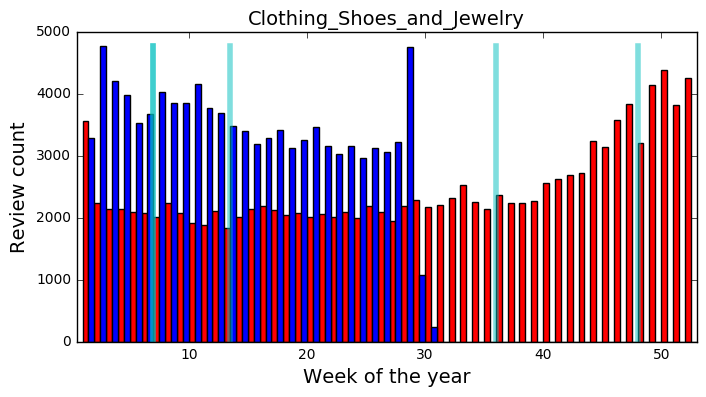

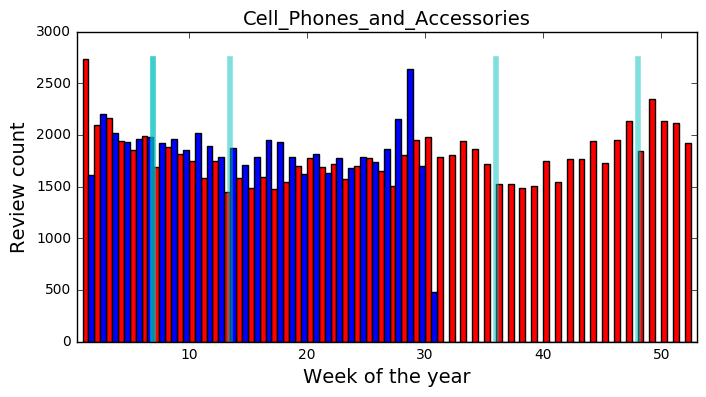

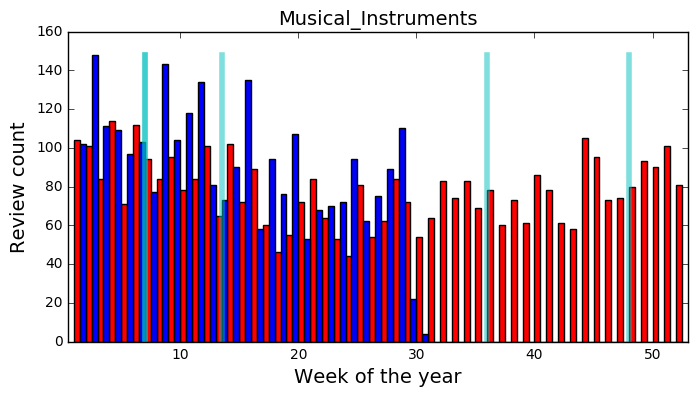

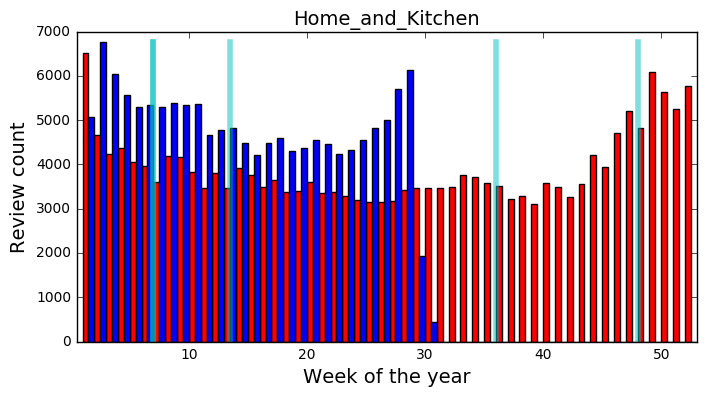

In [94]:
names= ['Beauty', 'Baby', 'Health_and_Personal_Care',
        'Grocery_and_Gourmet_Food', 'Patio_Lawn_and_Garden',
        'Amazon_Instant_Video', 'Kindle_Store', 'Electronics',
        'Pet_Supplies', 'Sports_and_Outdoors', 'Video_Games',
        'Clothing_Shoes_and_Jewelry', 'Cell_Phones_and_Accessories', 
        'Musical_Instruments', 'Home_and_Kitchen']

for cname in names:
    year = [2013, 2014]
    week13 = [i for i in range(1,53)]
    week14 = [(i + 0.5) for i in range(1,53)]

    plt.figure(figsize=(8, 4))
    c13 = category[cname][category[cname].reviewTime.dt.year == 2013]
    c13 = c13.groupby(c13.reviewTime.dt.week).count()
    c13 = c13[0:52]
    plt.bar(week13, c13.reviewTime, width = 0.5, color = 'r')

    c14 = category[cname][category[cname].reviewTime.dt.year == 2014]
    c14 = c14.groupby(c14.reviewTime.dt.week).count()
    for i in range(len(c14)+1, 53):
        c14.loc[i] = 0            
    plt.bar(week14, c14.reviewTime, width = 0.5, color = 'b')
    m = max(max(c13.reviewTime), max(c14.reviewTime))
    # President's day
    plt.plot([7,7],[0,m], linewidth = 4, color = 'c', alpha = 0.5)
    # Easter
    plt.plot([13.5,13.5],[0,m], linewidth = 4, color = 'c', alpha = 0.5)
    # Labor day, end of back to school
    plt.plot([36,36],[0,m], linewidth = 4, color = 'c', alpha = 0.5)
    # Black Friday   
    plt.plot([48,48],[0,m], linewidth = 4, color = 'c', alpha = 0.5)
#    plt.legend(['2013', '2014'], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(cname, fontsize=14)
    plt.xlabel('Week of the year', fontsize=14)
    plt.ylabel('Review count', fontsize=14)
    plt.xlim([0.5, 53])
#    plt.show()
    plt.savefig('figures/%s.png'%cname)


# ------------------------------------------------------------------------------------
## Various individual plots

2012
2013
2014


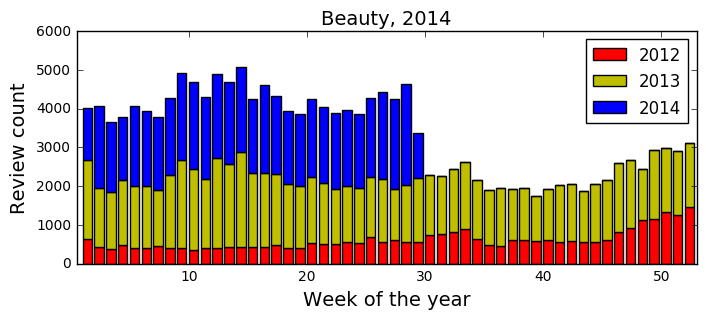

In [69]:
# names: 'Beauty', 'Baby', 'Health_and_Personal_Care',
#               'Grocery_and_Gourmet_Food', 'Patio_Lawn_and_Garden',
#               'Amazon_Instant_Video', 'Kindle_Store', 'Electronics',
#               'Pet_Supplies', 'Sports_and_Outdoors', 'Video_Games'
#               'Clothing_Shoes_and_Jewelry', 'Cell_Phones_and_Accessories', 
#               'Musical_Instruments', 'Home_and_Kitchen']
year = [2012, 2013, 2014]
week = [i for i in range(1,53)]
clr = ['r', 'y', 'b']


cname = 'Beauty'
b = np.zeros(52)
j = 0
plt.figure(figsize=(8, 3))
for y in year:
    print y
    c1 = category[cname][category[cname].reviewTime.dt.year == y]
    c = c1.groupby(c1.reviewTime.dt.week).count()
    c = c[0:52]
    if len(c) < 52:
        for i in range(len(c), 53):
            c.loc[i] = 0
            
    plt.bar(week, c.reviewTime, bottom = b, color = clr[j])
    b = [sum(x) for x in zip(b, c.reviewTime)]
    j += 1
    
plt.legend(['2012', '2013', '2014'])
plt.title('%s, %d'%(cname,y), fontsize=14)
plt.xlabel('Week of the year', fontsize=14)
plt.ylabel('Review count', fontsize=14)
plt.xlim([0.5, 53])
plt.show()



# ------------------------------------------------------------------------------------

2012
2013
2014


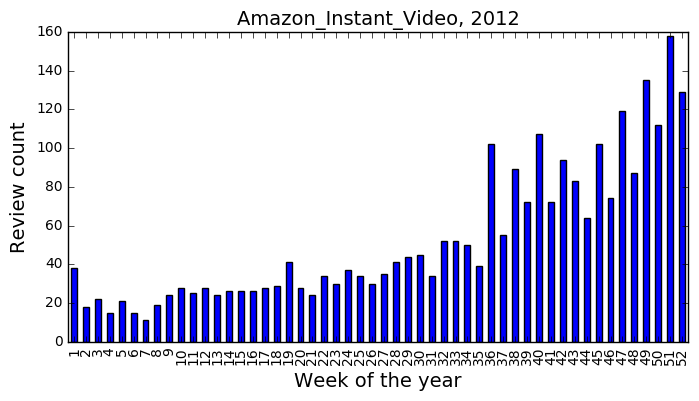

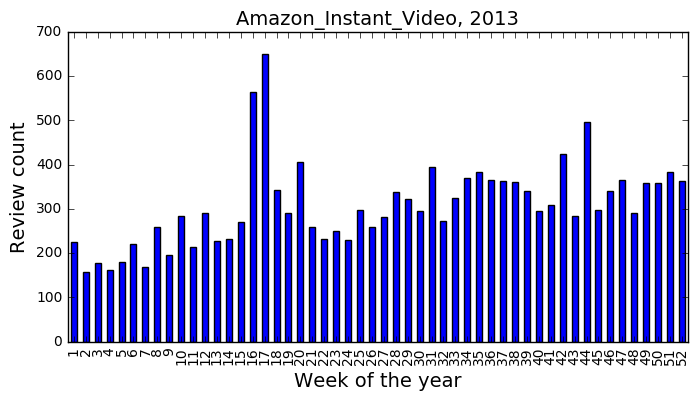

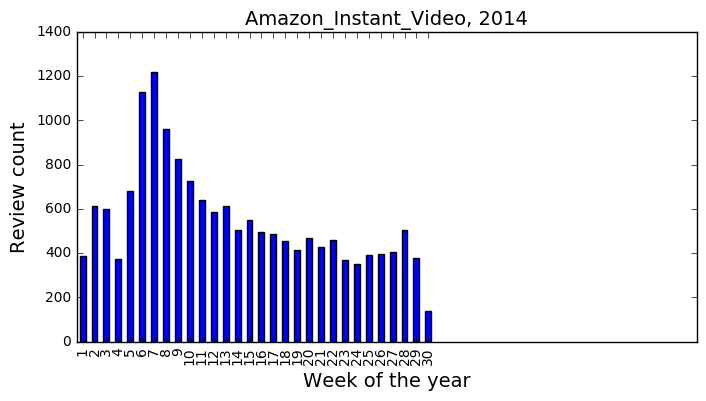

In [90]:
# names: 'Beauty', 'Baby', 'Health_and_Personal_Care',
#               'Grocery_and_Gourmet_Food', 'Patio_Lawn_and_Garden',
#               'Amazon_Instant_Video', 'Kindle_Store', 'Electronics',
#               'Pet_Supplies', 'Sports_and_Outdoors', 'Video_Games'
#               'Clothing_Shoes_and_Jewelry', 'Cell_Phones_and_Accessories', 
#               'Musical_Instruments', 'Home_and_Kitchen']
year = [2012, 2013, 2014]
cname = 'Amazon_Instant_Video'
for y in year:
    print y
    c1 = category[cname][category[cname].reviewTime.dt.year == y]
    c = c1.groupby(c1.reviewTime.dt.week).count()
    #c = category['Health_and_Personal_Care'].groupby(category['Health_and_Personal_Care'].reviewTime.dt.week).count()
    c.plot(kind="bar", figsize=(8, 4))
    plt.legend().set_visible(False)
    plt.title('%s, %d'%(cname,y), fontsize=14)
    plt.xlabel('Week of the year', fontsize=14)
    plt.ylabel('Review count', fontsize=14)
    plt.xlim([-0.5, 51.5])
    #plt.ylim([0, 2])
    plt.savefig('figures/%s_%d.png'%(cname, y))


# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
## Scrape Box Office Mojo web page to generate sales figures for 2011-2015

In [96]:
import urllib2
from bs4 import BeautifulSoup

year = {'2011':0, '2012':0, '2013':0, '2014':0, '2015':0}

for y in year: 
        
    print y

    # Scraping "Box Office Mojo" year 20xx  
    url = 'http://www.boxofficemojo.com/weekly/?yr=%s&p=.htm'%y
    page = urllib2.urlopen(url)
    
    soup = BeautifulSoup(page)
    
    # Read Tables
    sales = []
    for tr in soup.find_all('tr')[3:]:
        tds = tr.find_all('td')
        #print "Week: %s, Sales: %s, Change: %s" % \
        #      (tds[0].text, tds[1].text, tds[2].text)
        sales.append(tds[1].text.encode('ascii','ignore'))
    sales = sales[1:]
    
    # After finding the right table and variable, clean up and convert to numbers
    sales_w = []
    week = []
    j = 1
    for i in sales:
        tmp = i.replace('$','')
        tmp = tmp.replace(',','')
        tmp = int(tmp)
        sales_w.append(tmp)
        week.append(j)
        j += 1

    year[y] = sales_w

2015


/Users/babak/anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/babak/anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


2014
2011
2013
2012


2011
2012
2013
2014
2015


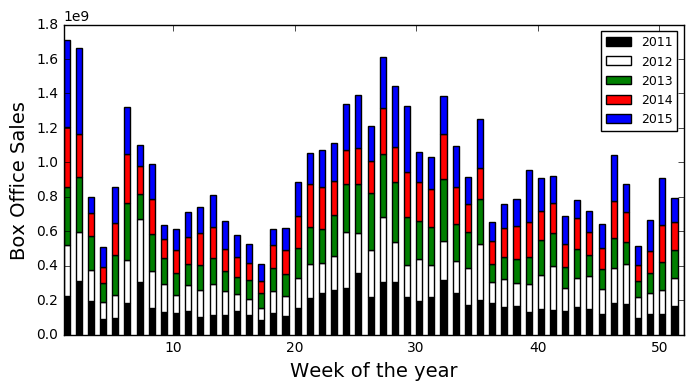

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

clr = ['k', 'w', 'g', 'r', 'b']
yr = ['2011', '2012', '2013', '2014', '2015']

b = np.zeros(52)
plt.figure(figsize=(8, 4))

for y, c in zip(yr, clr):
    print y
    plt.bar(week, year[y], bottom = b, color = c, width = 0.5)
    b = [sum(x) for x in zip(b, year[y])]
    plt.xlim([1,52])
plt.xlabel('Week of the year', fontsize=14)
plt.ylabel('Box Office Sales', fontsize=14)
plt.legend(yr, fontsize = 9, loc = 0)
plt.savefig('figures/BoxOfficeMojo.png')

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
## Look for periodic patterns

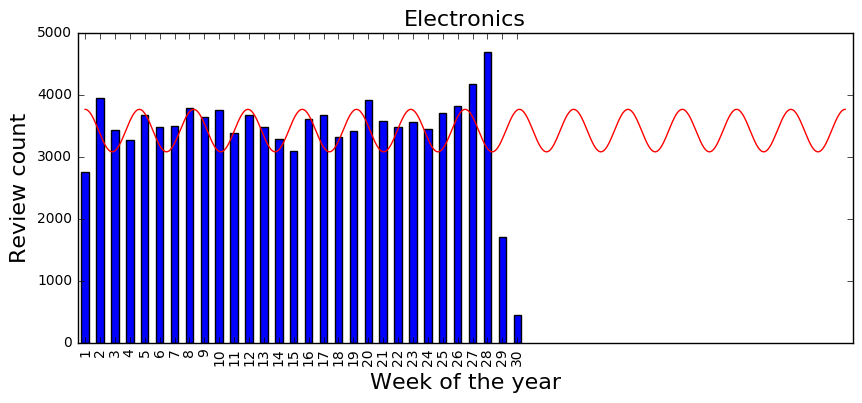

In [12]:
c1 = category['Health_and_Personal_Care'][category['Health_and_Personal_Care'].reviewTime.dt.year == 2014]
c = c1.groupby(c1.reviewTime.dt.week).count()
#c = category['Health_and_Personal_Care'].groupby(category['Health_and_Personal_Care'].reviewTime.dt.week).count()
c.plot(kind="bar", figsize=(10, 4))
x = np.linspace(0.,2*np.pi*14.,1000)
xx = np.linspace(0.,51.,1000)
y = np.cos(x) * int(np.mean(c)) / 10 + int(np.mean(c))
plt.plot(xx, y, color = 'r')
plt.legend().set_visible(False)
plt.title(cname, fontsize=16)
plt.xlabel('Week of the year', fontsize=16)
plt.ylabel('Review count', fontsize=16)
plt.xlim([-0.5, 51.5])
#plt.ylim([0, 2])
plt.show()


## Fourier analysis of the review counts

52


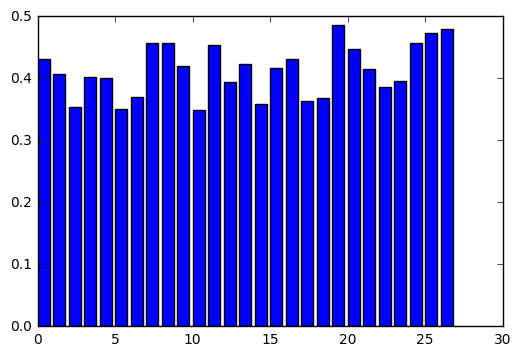

In [13]:
# Fourier transform

c = category['Health_and_Personal_Care'].groupby(category['Health_and_Personal_Care'].reviewTime.dt.week).count()
c = (c[0:52] - np.min(c[0:52])) / np.max(c[0:52]) 
n = 52
f = np.fft.rfft(c)
fr = np.fft.fftfreq(n)
print len(f)
freq = np.abs(fr)

plt.figure()
y = f[0:n/2+1].real
x = np.arange(len(y))
plt.bar(x, y)
#plt.xlim([0,0.6])
plt.show()
